# 專題分析-全球地表溫度資料集

## 資料來源：Climate Change: Earth Surface Temperature Data
#### https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("GlobalTemperatures.csv", encoding='big5')
df.head()

,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573


In [2]:
df = df.dropna().reset_index(drop=True)

In [3]:
for i in range(len(df)):
    if(df.loc[i, 'dt'][4]=='-'):
        df.loc[i,'year'] = df.loc[i, 'dt'].split("-")[0]
    else:
        df.loc[i,'year'] = df.loc[i, 'dt'].split("/")[0]
df

,dt,LandAverageTemperature,year
0,1750-01-01,3.034,1750
1,1750-02-01,3.083,1750
2,1750-03-01,5.626,1750
3,1750-04-01,8.490,1750
4,1750-05-01,11.573,1750
5,1750-06-01,12.937,1750
6,1750-07-01,15.868,1750
7,1750-08-01,14.750,1750
8,1750-09-01,11.413,1750
9,1750-10-01,6.367,1750


In [4]:
df_year = df.groupby('year').mean()
df_year

,LandAverageTemperature
year,
1750,8.719364
1751,7.976143
1752,5.779833
1753,8.388083
1754,8.469333
1755,8.355583
1756,8.849583
1757,9.022000
1758,6.743583


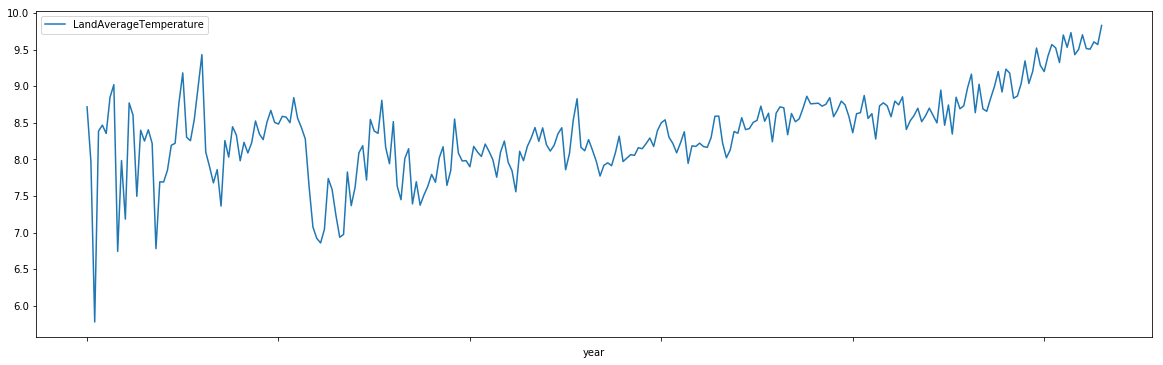

In [5]:
%matplotlib inline
df_year.plot(figsize=(20,6))

# 產生序列(X)對序列(Y)-X=t, Y=t+1

In [6]:
df_reset_year = df_year.reset_index(drop=True)
df_rnn = pd.DataFrame(columns=['X','Y'])
for i in range(len(df_year)-1):
        df_rnn.loc[i,'X'] = df_reset_year.loc[i, 'LandAverageTemperature']
        df_rnn.loc[i,'Y'] = df_reset_year.loc[i+1, 'LandAverageTemperature']

In [7]:
df_rnn

,X,Y
0,8.71936,7.97614
1,7.97614,5.77983
2,5.77983,8.38808
3,8.38808,8.46933
4,8.46933,8.35558
5,8.35558,8.84958
6,8.84958,9.022
7,9.022,6.74358
8,6.74358,7.98508
9,7.98508,7.18517


In [8]:
X_rnn = np.array(df_rnn.X).reshape(len(df_rnn), 1, 1)
y_rnn = np.array(df_rnn.Y).reshape(len(df_rnn), 1)
print(X_rnn.shape)
print(y_rnn.shape)

(265, 1, 1)
(265, 1)


In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.recurrent import SimpleRNN, LSTM

Using TensorFlow backend.


# SimpleRNN

In [10]:
# RNN/LSTM: input format (batch_size, timesteps, input_dim)
model = Sequential()
model.add(SimpleRNN(units=20, input_shape=(1,1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 20)                440       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.fit(X_rnn, y_rnn, epochs=100, batch_size=5, verbose=2)

Epoch 1/100
 - 0s - loss: 91.9686
Epoch 2/100
 - 0s - loss: 66.2556
Epoch 3/100
 - 0s - loss: 43.9074
Epoch 4/100
 - 0s - loss: 22.0712
Epoch 5/100
 - 0s - loss: 8.2915
Epoch 6/100
 - 0s - loss: 3.9836
Epoch 7/100
 - 0s - loss: 2.2786
Epoch 8/100
 - 0s - loss: 1.3802
Epoch 9/100
 - 0s - loss: 0.8779
Epoch 10/100
 - 0s - loss: 0.5963
Epoch 11/100
 - 0s - loss: 0.4455
Epoch 12/100
 - 0s - loss: 0.3667
Epoch 13/100
 - 0s - loss: 0.3264
Epoch 14/100
 - 0s - loss: 0.3072
Epoch 15/100
 - 0s - loss: 0.2986
Epoch 16/100
 - 0s - loss: 0.2946
Epoch 17/100
 - 0s - loss: 0.2926
Epoch 18/100
 - 0s - loss: 0.2915
Epoch 19/100
 - 0s - loss: 0.2913
Epoch 20/100
 - 0s - loss: 0.2909
Epoch 21/100
 - 0s - loss: 0.2907
Epoch 22/100
 - 0s - loss: 0.2909
Epoch 23/100
 - 0s - loss: 0.2907
Epoch 24/100
 - 0s - loss: 0.2903
Epoch 25/100
 - 0s - loss: 0.2900
Epoch 26/100
 - 0s - loss: 0.2897
Epoch 27/100
 - 0s - loss: 0.2895
Epoch 28/100
 - 0s - loss: 0.2898
Epoch 29/100
 - 0s - loss: 0.2893
Epoch 30/100
 - 0s 

In [13]:
y_pred_rnn = model.predict(X_rnn).reshape(-1)

In [14]:
y_pred_rnn.shape

(265,)

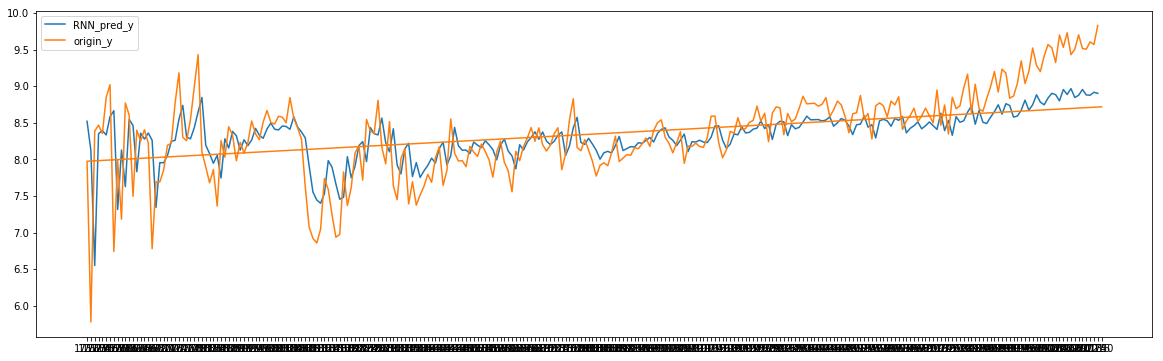

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.plot(df_year.index[1:266], y_pred_rnn, label='RNN_pred_y')
plt.plot(df_year.index, df_year.LandAverageTemperature, label='origin_y')
plt.legend()

# LSTM

In [22]:
# RNN/LSTM: input format (batch_size, timesteps, input_dim)
model = Sequential()
model.add(LSTM(units=20, input_shape=(1,1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                1760      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_rnn, y_rnn, epochs=100, batch_size=5, verbose=2)

Epoch 1/100
 - 2s - loss: 64.8525
Epoch 2/100
 - 1s - loss: 54.3589
Epoch 3/100
 - 1s - loss: 40.4754
Epoch 4/100
 - 1s - loss: 25.9117
Epoch 5/100
 - 1s - loss: 14.4054
Epoch 6/100
 - 1s - loss: 6.9458
Epoch 7/100
 - 1s - loss: 3.1254
Epoch 8/100
 - 1s - loss: 1.4535
Epoch 9/100
 - 1s - loss: 0.7742
Epoch 10/100
 - 1s - loss: 0.4880
Epoch 11/100
 - 1s - loss: 0.3620
Epoch 12/100
 - 1s - loss: 0.3102
Epoch 13/100
 - 1s - loss: 0.2871
Epoch 14/100
 - 1s - loss: 0.2752
Epoch 15/100
 - 1s - loss: 0.2662
Epoch 16/100
 - 1s - loss: 0.2586
Epoch 17/100
 - 1s - loss: 0.2525
Epoch 18/100
 - 1s - loss: 0.2465
Epoch 19/100
 - 1s - loss: 0.2407
Epoch 20/100
 - 1s - loss: 0.2361
Epoch 21/100
 - 1s - loss: 0.2315
Epoch 22/100
 - 1s - loss: 0.2273
Epoch 23/100
 - 1s - loss: 0.2240
Epoch 24/100
 - 1s - loss: 0.2213
Epoch 25/100
 - 1s - loss: 0.2191
Epoch 26/100
 - 1s - loss: 0.2170
Epoch 27/100
 - 1s - loss: 0.2152
Epoch 28/100
 - 1s - loss: 0.2127
Epoch 29/100
 - 1s - loss: 0.2101
Epoch 30/100
 - 1s

In [19]:
y_pred_lstm = model.predict(X_rnn).reshape(-1)

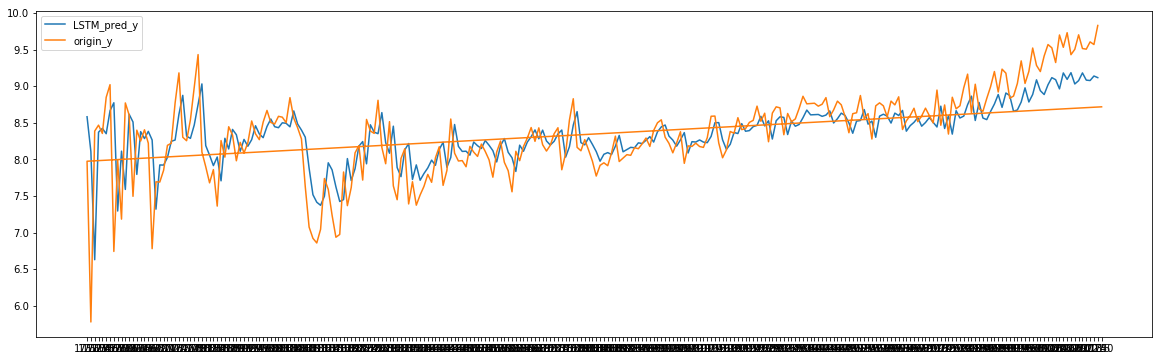

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.plot(df_year.index[1:266], y_pred_lstm, label='LSTM_pred_y')
plt.plot(df_year.index, df_year.LandAverageTemperature, label='origin_y')
plt.legend()

# MLP

In [23]:
model = Sequential()
model.add(Dense(20, input_dim=1))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                40        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 21        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [25]:
X_mlp = df_rnn[['X']]
y_mlp = df_rnn[['Y']]

In [26]:
history = model.fit(X_mlp.values, y_mlp.values, epochs=100, batch_size=5)

Epoch 1/100
265/265 [==============================] - 1s 3ms/step - loss: 117.8721
Epoch 2/100
265/265 [==============================] - 0s 947us/step - loss: 46.8067
Epoch 3/100
265/265 [==============================] - 0s 873us/step - loss: 13.7531
Epoch 4/100
265/265 [==============================] - 0s 870us/step - loss: 2.6460
Epoch 5/100
265/265 [==============================] - 0s 825us/step - loss: 0.4267
Epoch 6/100
265/265 [==============================] - 0s 867us/step - loss: 0.1858
Epoch 7/100
265/265 [==============================] - 0s 1ms/step - loss: 0.1730
Epoch 8/100
265/265 [==============================] - 0s 836us/step - loss: 0.1717
Epoch 9/100
265/265 [==============================] - 0s 875us/step - loss: 0.1713
Epoch 10/100
265/265 [==============================] - 0s 1ms/step - loss: 0.1714
Epoch 11/100
265/265 [==============================] - 0s 830us/step - loss: 0.1716
Epoch 12/100
265/265 [==============================] - 0s 849us/step - loss

265/265 [==============================] - 0s 918us/step - loss: 0.1731
Epoch 98/100
265/265 [==============================] - 0s 929us/step - loss: 0.1704
Epoch 99/100
265/265 [==============================] - 0s 855us/step - loss: 0.1693
Epoch 100/100
265/265 [==============================] - 0s 857us/step - loss: 0.1745


In [27]:
y_pred_mlp = model.predict(X_mlp.values).reshape(-1)

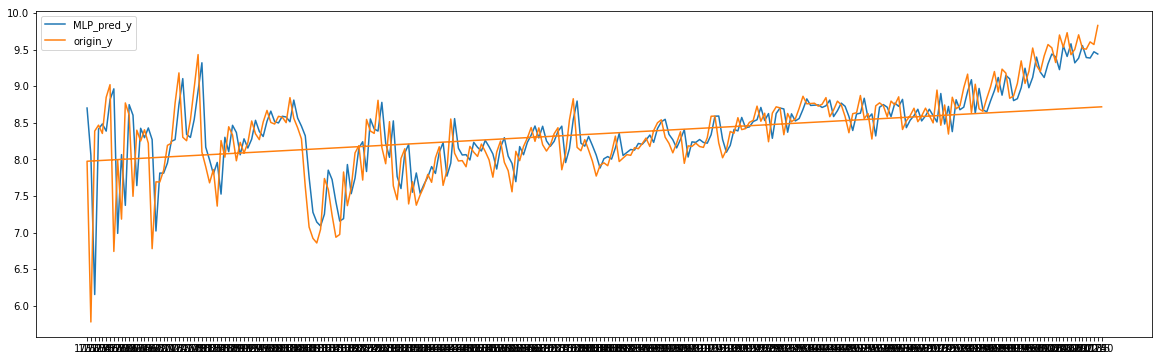

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.plot(df_year.index[1:266], y_pred_mlp, label='MLP_pred_y')
plt.plot(df_year.index, df_year.LandAverageTemperature, label='origin_y')
plt.legend()